## **MINERALS OF ENERGY TRANSITION** 

**EXPLORATORY DATA ANALYSIS (EDA)**

**DISCLAIMER:** <br>
*The data used for analyzing the market was obtained from open sources, the information and insights in the present document can't be used with commercial purposes keeping each data source with their original licences.*

**INTRODUCTION:** <br>
**The business domain:**
In the Special Report "The Role of Critical Minerals in Clean Energy Transitions"[1], the International Energy Agency (IEA) states that critical minerals are a new challenge to energy security where this concept of "energy security" is related to different agencies' theory, among them, the energy trilemma [2] of World Energy Council.

Back to the IEA report, there are some context facts that bring light to the impact of the new energy paradigm:
* An electric car requires six times the mineral inputs of a conventional car.
* An onshore wind plant requires nine times more mineral resources than a gas-fired power plant.
* The average amount of minerals needed for a new unit of power generation capacity has increased by 50% since 2010 as the share of renewables has risen.
There are other interesting facts about the domain in the report, but having established the previous ones, in the report's executive summary there is another concept that contextualizes the importance of analyzing the domain which is that the International Energy Security mechanisms are designed to provide insurance against the risks of disruptions or price spikes in the supplies of hydrocarbons while the minerals offer a set of different challenges.


**The technical challenges:** 
The analysis has two main edges, analyzing data in an aggregated way and analyzing data as a time series. Both analysis paradigm requires different treatment of data due to its structural characteristics:
Aggregated data is not related to time sequence relations among its data points and can be turned into simple classification problems, while a time series requires special attention to its components due to it own definition, a time series is a time-ordered sequence of observations in regular time intervals, so it has a time axis and a time relation among its data points. With time series there is another important aspect, its components, A time series can have besides its level or original values three components:
* a trend component that represents long-term changes (increase or decrease) in the data.
* a seasonal pattern that can occur when data is affected by seasonal factors with a fixed and known frequency.
* a cycle component when there are rises and falls that aren’t a fixed frequency (seasonal patterns) and are often related to business cycles.
* a random component which contains anything else in the time series.

For further time series concepts, [Robert Hyndman and George Athanasopoulos](https://otexts.com/fpp2/tspatterns.html) present a very good book to get a base for time series comprehension. You can also consult [Statistics Canada](https://www.statcan.gc.ca/en/dai/btd/sad-faq/sec1) to get some concepts of time series.
The time series components understanding is very important to know how to deal with time-related data and most of it to understand how to deal with time patterns in clustering for multiple series. 
Another special issue to take into account is the differences between seasonal and cyclic concepts wich, [Robert Hyndman and George Athanasopoulos](https://otexts.com/fpp2/tspatterns.html) present clearly.



**OBJECTIVE:** <br>
To explore the market of the main energy transition minerals exploiting its production data to describe the main characteristics and behaviour from the perspective of minerals producer countries.


**PIPELINE:** <br>
* Aggregated Data Analysis
* Time Series Component Analysis


### 00.00. RESOURCES AND WORK ENVIRONMENT SETTING
#### 00.01. LIBRARIES AND WD

In [1]:
##-- ENVIRONMENT SETTINGS
import pandas as pd 
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#-- Custom Libraries
main_wd = os.getcwd()[:os.getcwd().find('2023.Minerals-EDA') + len('2023.Minerals-EDA') +1]
os.chdir(main_wd)
os.chdir([x for x in json.load(open('./config/config.json',))[0]['directory'] if 'wd_custom_libraries' in x][0]['wd_custom_libraries'])    
#import aux_time_series

os.chdir(main_wd)

In [3]:
##-- Work Directory  
wd_in = [x for x in json.load(open('./config/config.json',))[0]['data'] if 'processed' in x][0]['processed']
csvAttr_imp = json.load(open('./config/config.json',))[0]['csvAttr_imp'][0]
csvAttr_exp = json.load(open('./config/config.json',))[0]['csvAttr_exp'][0]

In [4]:
def comparative_table(data, time_window, time_var, target, category, filter_values, unit_convert):
    data = df.copy()
    max_time_var_value = data[time_var].max()
    min_time_var_value = data[time_var].max() - time_window

    data_left = data[(data[filter_values[0]] == filter_values[1]) & (data[time_var] ==  max_time_var_value)].groupby(category).agg(value = (target,'sum')).reset_index().sort_values('value',ascending = False).reset_index(drop = True)
    data_left['value'] = data_left['value'] / unit_convert[1]
    data_left[f'%_share_in_{max_time_var_value}'] = np.round(( data_left['value'] / data_left['value'].sum() ) * 100,2)
    data_left.rename(columns = {'value':f'value_in_{max_time_var_value}'}, inplace = True)

    data_right = data[(data[filter_values[0]] == filter_values[1]) & (data[time_var] == min_time_var_value )].groupby(category).agg(value = (target,'sum')).reset_index().sort_values('value',ascending = False).reset_index(drop = True)
    data_right['value'] = data_right['value'] / unit_convert[1]
    data_right[f'%_share_in_{min_time_var_value}'] = np.round(( data_right['value'] / data_right['value'].sum() ) * 100,2)
    data_right.rename(columns = {'value':f'value_in_{min_time_var_value}'}, inplace = True)

    data_result = data_left.copy().merge(data_right, on = category, how = 'left')
    data_result[f'%_of_share_change'] = np.round((data_result[f'%_share_in_{max_time_var_value}'] - data_result[f'%_share_in_{min_time_var_value}']), 2)
    data_result[f'%_of_value_change'] = np.round( ( (data_result[f'value_in_{max_time_var_value}'] - data_result[f'value_in_{min_time_var_value}']) / data_result[f'value_in_{min_time_var_value}']) * 100 , 2)

    print(f'{target.title().replace("_"," ")} of minerals in {min_time_var_value} and {max_time_var_value} years by {unit_convert[0]}')
    display(data_result)

#### 00.02 DATA
XXXXXXXXXX



In [5]:
csvAttr_imp

{'sep': ';', 'encoding': 'UTF-8'}

In [6]:
df = pd.read_csv(wd_in + '/ft_minerals.csv.gz', sep = csvAttr_imp['sep'], encoding = csvAttr_imp['encoding'])
df.head()

,country_code,country_desc,region_desc,mineral_code,mineral_desc,unit_code,unit_desc,year,quantity_produced,quantity_import,...,seasonal,trend,cluster_by_trend_dtw,cluster_by_seasonal_dtw,cluster_by_residual_dtw,cluster_by_trend,cluster_by_seasonal,cluster_by_residual,outlier,imputed_residual_values
0,CMR,cameroon,Africa,cm01,aluminium,1,tonnes,1970,52000.0,0.0,...,3047.164352,0.0,0,0,0,0,0,0,False,0.0
1,EGY,egypt,Africa,cm01,aluminium,1,tonnes,1970,0.0,0.0,...,-1710.436921,0.0,0,0,0,0,0,0,False,0.0
2,GHA,ghana,Africa,cm01,aluminium,1,tonnes,1970,113000.0,0.0,...,25059.293692,0.0,0,0,0,0,0,0,False,0.0
3,MOZ,mozambique,Africa,cm01,aluminium,1,tonnes,1970,0.0,0.0,...,6046.878183,0.0,0,0,0,0,0,0,False,0.0
4,NGA,nigeria,Africa,cm01,aluminium,1,tonnes,1970,0.0,0.0,...,-3027.256944,0.0,0,0,0,0,0,0,False,0.0


In [7]:
df.columns

Index(['country_code', 'country_desc', 'region_desc', 'mineral_code',
       'mineral_desc', 'unit_code', 'unit_desc', 'year', 'quantity_produced',
       'quantity_import', 'quantity_export', 'value_export', 'value_import',
       'trade_isna', 'dimension', 'produced_percentage_of_global',
       'produced_percentage_of_region', 'imports_percentage_of_global',
       'imports_percentage_of_region', 'exports_percentage_of_global',
       'exports_percentage_of_region', 'imports_USD_percentage_of_global',
       'imports_USD_percentage_of_region', 'exports_USD_percentage_of_global',
       'exports_USD_percentage_of_region', 'level_original', 'residual',
       'seasonal', 'trend', 'cluster_by_trend_dtw', 'cluster_by_seasonal_dtw',
       'cluster_by_residual_dtw', 'cluster_by_trend', 'cluster_by_seasonal',
       'cluster_by_residual', 'outlier', 'imputed_residual_values'],
      dtype='object')

### 01.00 Descriptive Analysis
#### 01.01 Minerals: General Production



In [8]:
##--Tonnes

time_window = 10
time_var = 'year'
target = 'quantity_produced'
category = ['mineral_desc']
filter_values = ('unit_code',1)
unit_convert = ('millions of tonnes', 1000000)

data = df.copy()
    
comparative_table(data, time_window, time_var, target, category, filter_values, unit_convert)


Quantity Produced of minerals in 2010 and 2020 years by millions of tonnes


,mineral_desc,value_in_2020,%_share_in_2020,value_in_2010,%_share_in_2010,%_of_share_change,%_of_value_change
0,steel,1862.819457,88.34,1432.084503,88.03,0.31,30.08
1,aluminium,65.213856,3.09,41.454093,2.55,0.54,57.32
2,copper,63.422175,3.01,48.230935,2.96,0.05,31.50
3,manganese,52.079082,2.47,45.212584,2.78,-0.31,15.19
4,chromium,29.779224,1.41,27.844310,1.71,-0.30,6.95
5,zinc,26.564439,1.26,25.398664,1.56,-0.30,4.59
6,nickel,5.055056,0.24,3.074032,0.19,0.05,64.44
7,lithium,1.771104,0.08,0.559204,0.03,0.05,216.72
8,graphite,1.093719,0.05,2.128707,0.13,-0.08,-48.62
9,rare earths,0.347661,0.02,0.247128,0.02,0.00,40.68


In [9]:
##-- MTOE
time_window = 10
time_var = 'year'
target = 'quantity_produced'
category = 'mineral_desc'
filter_values = ('unit_code',0)
unit_convert = ('mtoe', 1)
    
comparative_table(data, time_window, time_var, target, category, filter_values, unit_convert)

Quantity Produced of minerals in 2010 and 2020 years by mtoe


,mineral_desc,value_in_2020,%_share_in_2020,value_in_2010,%_share_in_2010,%_of_share_change,%_of_value_change
0,petroleum,4536.323117,53.55,4269.759335,56.76,-3.21,6.24
1,natural gas,3934.260051,46.45,3253.206396,43.24,3.21,20.93


##### 01.02 Minerals: Petroleum and Natural Gas

In [10]:
data[data[index].isin(index_values)].reset_index(drop = True)[[hue_value,index,target]].copy()

NameError: name 'index' is not defined

In [ ]:
category_values = ['petroleum']
hue_value = 'country_code'
index = 'year'


data_temp = data[data[category].isin(category_values)].reset_index(drop = True)[[hue_value,index,target]].copy()


data_scaled = pd.DataFrame()
for h in data_temp[hue_value].unique():
    scaler = MinMaxScaler()

    temp = data_temp[data_temp[hue_value] == h].reset_index(drop = True).copy()
    temp[f'{target}_scaled'] = scaler.fit(temp[target])

    data_scaled = pd.concat([data_scaled,temp])





ValueError: Expected 2D array, got 1D array instead:
array=[27.35998854 29.66824305 31.08101653 28.79884399 28.90751887 28.82709946
 27.33499331 20.73516767 26.10370689 31.71133085 30.47243718 20.82210758
 16.8989443  18.36605522 22.93040031 18.4747301  19.45280405 21.95232636
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<Axes: xlabel='quantity_produced', ylabel='Density'>

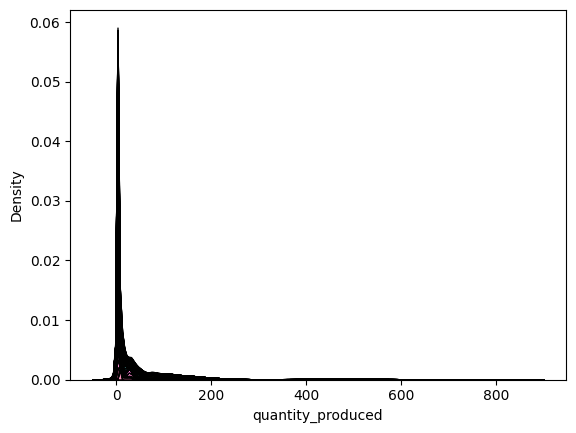

In [ ]:
sns.kdeplot(data=dt, x=target, hue=hue_value, multiple="stack", legend = False)